In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:

def create_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def train_model(optimizer_name, lr=0.01, X_train=None, y_train=None, X_val=None, y_val=None, epochs=50):
  start_time = time()
  batch_size = None
  model = create_model()
  if optimizer_name == "SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 1
  elif optimizer_name == "Mini-batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 64
  elif optimizer_name == "Batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = X_train.shape[0]
  elif optimizer_name == "Mini-batch SGD with Decay":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.0)
  elif optimizer_name == "SGD with Decay and Momentum":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.9)
    batch_size = 1
  elif optimizer_name == "Adam":
    optimizer = Adam(lr=lr)
  elif optimizer_name == "RMSprop":
    optimizer = RMSprop(lr=lr)
  else:
    raise ValueError(f"Invalid optimizer name: {optimizer_name}")
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  print(batch_size)
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)
  end_time = time()
  training_time = end_time - start_time

  # Track best model based on validation accuracy
  best_model = model
  best_val_acc = max(history.history['val_accuracy'])
  for i in range(len(history.history['val_accuracy'])):
    if history.history['val_accuracy'][i] == best_val_acc:
      best_model = model.get_weights()
      break

  # Plot learning curves
  plt.plot(history.history['loss'], label=f'Training Loss ({optimizer_name})')
  plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer_name})')
  plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
  plt.title(f'Learning Curves ({optimizer_name})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss/Accuracy')
  plt.legend()
  plt.show()

  return history, training_time, best_model

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)


SGD



1
Epoch 1/50



48000/48000 [==============================] - 82s 2ms/step - loss: 0.2515 - accuracy: 0.9241 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 2/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.1209 - accuracy: 0.9626 - val_loss: 0.1036 - val_accuracy: 0.9704
Epoch 3/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0853 - accuracy: 0.9723 - val_loss: 0.1231 - val_accuracy: 0.9666
Epoch 4/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.1047 - val_accuracy: 0.9709
Epoch 5/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.1236 - val_accuracy: 0.9676
Epoch 6/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 7/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.1232 - val

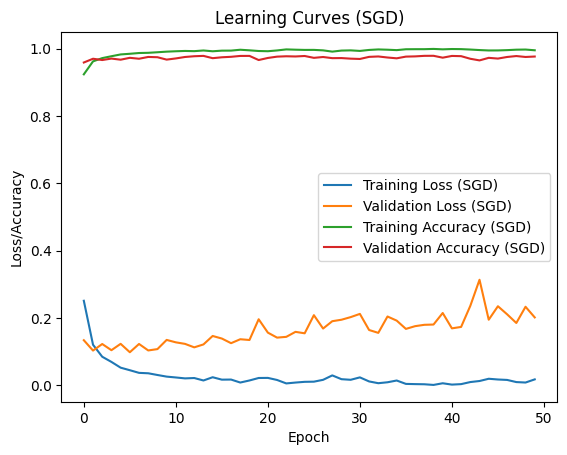

Mini-batch SGD
64
Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 0.9989 - accuracy: 0.7431 - val_loss: 0.4832 - val_accuracy: 0.8712
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4013 - accuracy: 0.8900 - val_loss: 0.3613 - val_accuracy: 0.9029
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3263 - accuracy: 0.9068 - val_loss: 0.3112 - val_accuracy: 0.9149
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2904 - accuracy: 0.9167 - val_loss: 0.2850 - val_accuracy: 0.9210
Epoch 5/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2654 - accuracy: 0.9239 - val_loss: 0.2637 - val_accuracy: 0.9268
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.2463 - accuracy: 0.9289 - val_loss: 0.2469 - val_accuracy: 0.9320
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2301 - accuracy: 0.9343 - val_loss: 0.2364 - val_accur

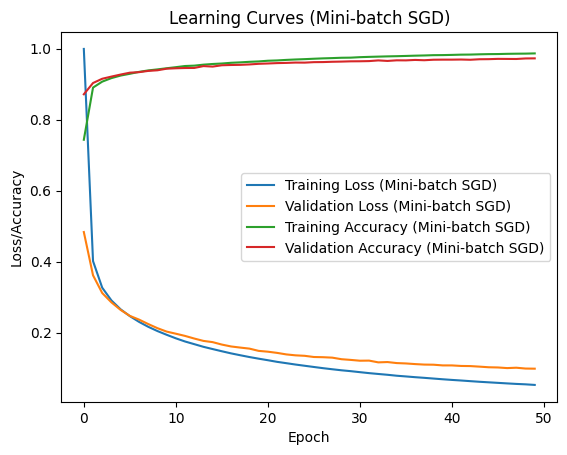

Batch SGD
48000
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.3429 - accuracy: 0.1091 - val_loss: 2.3354 - val_accuracy: 0.1160
Epoch 2/50
1/1 [==============================] - 0s 152ms/step - loss: 2.3374 - accuracy: 0.1128 - val_loss: 2.3301 - val_accuracy: 0.1190
Epoch 3/50
1/1 [==============================] - 0s 195ms/step - loss: 2.3321 - accuracy: 0.1158 - val_loss: 2.3249 - val_accuracy: 0.1217
Epoch 4/50
1/1 [==============================] - 0s 190ms/step - loss: 2.3268 - accuracy: 0.1193 - val_loss: 2.3198 - val_accuracy: 0.1251
Epoch 5/50
1/1 [==============================] - 0s 183ms/step - loss: 2.3217 - accuracy: 0.1225 - val_loss: 2.3148 - val_accuracy: 0.1287
Epoch 6/50
1/1 [==============================] - 0s 213ms/step - loss: 2.3166 - accuracy: 0.1263 - val_loss: 2.3098 - val_accuracy: 0.1327
Epoch 7/50
1/1 [==============================] - 0s 215ms/step - loss: 2.3116 - accuracy: 0.1303 - val_loss: 2.3050 - val_accuracy: 0.1373
Epoch 8

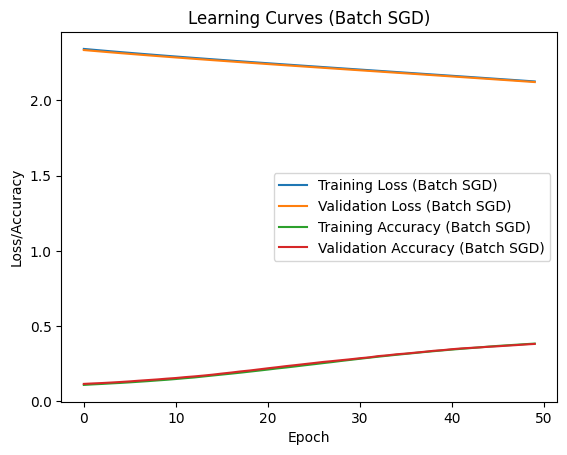

Mini-batch SGD with Decay
None
Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7413 - accuracy: 0.7991 - val_loss: 0.3640 - val_accuracy: 0.9003
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.9090 - val_loss: 0.2899 - val_accuracy: 0.9208
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9247 - val_loss: 0.2519 - val_accuracy: 0.9312
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9344 - val_loss: 0.2315 - val_accuracy: 0.9354
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2072 - accuracy: 0.9410 - val_loss: 0.2094 - val_accuracy: 0.9423
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.1917 - val_accuracy: 0.9454
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1719 - accuracy: 0.9508 - v

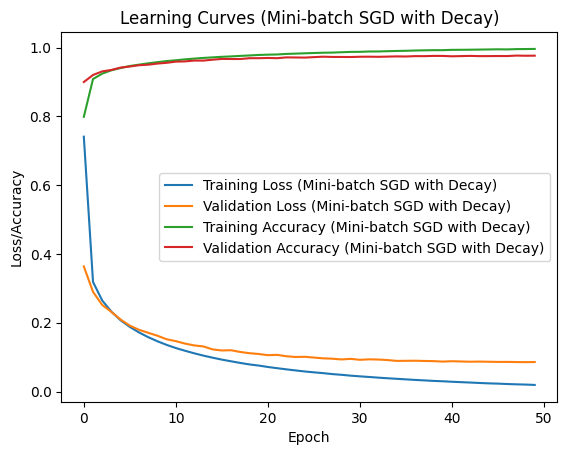

SGD with Decay and Momentum
1
Epoch 1/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.2172 - accuracy: 0.1611 - val_loss: 2.3228 - val_accuracy: 0.1027
Epoch 2/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.3238 - accuracy: 0.1006 - val_loss: 2.3239 - val_accuracy: 0.0992
Epoch 3/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3238 - accuracy: 0.1030 - val_loss: 2.3298 - val_accuracy: 0.0966
Epoch 4/50
48000/48000 [==============================] - 101s 2ms/step - loss: 2.3231 - accuracy: 0.1029 - val_loss: 2.3200 - val_accuracy: 0.0992
Epoch 5/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3239 - accuracy: 0.1010 - val_loss: 2.3121 - val_accuracy: 0.1018
Epoch 6/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3237 - accuracy: 0.1018 - val_loss: 2.3124 - val_accuracy: 0.1018
Epoch 7/50
48000/48000 [==============================] - 95s 2ms/step - loss: 2.3239 -

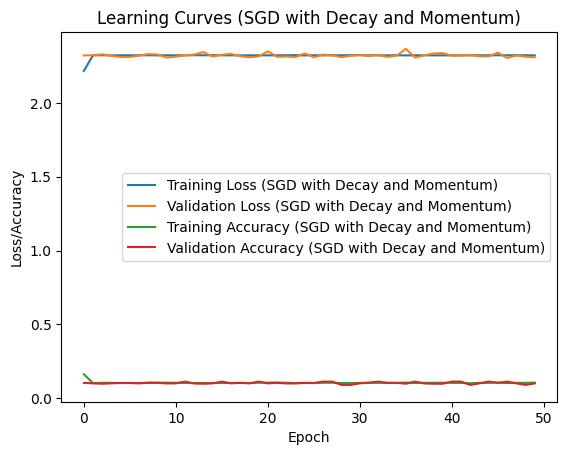

Adam
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9222 - val_loss: 0.1546 - val_accuracy: 0.9527
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9749 - val_loss: 0.1042 - val_accuracy: 0.9703
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0871 - val_accuracy: 0.9758
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0937 - val_accuracy: 0.9746
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0916 - val_accuracy: 0.9742
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.1011 - val

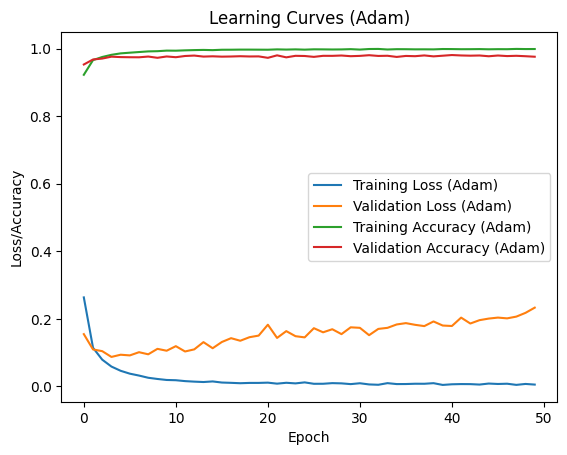

RMSprop
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9217 - val_loss: 0.1595 - val_accuracy: 0.9520
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1166 - accuracy: 0.9656 - val_loss: 0.1154 - val_accuracy: 0.9680
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0891 - val_accuracy: 0.9764
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.1227 - val_accuracy: 0.9716
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.0988 - val_accuracy: 0.9770
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.1092 - 

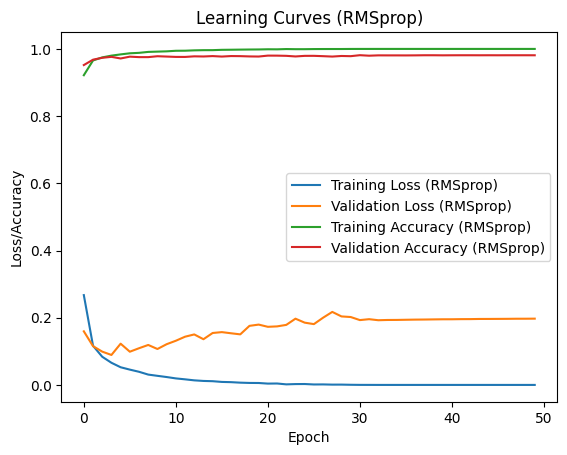

Training Time Comparison:
SGD: 5025.03 seconds
Mini-batch SGD: 139.74 seconds
Batch SGD: 10.93 seconds
Mini-batch SGD with Decay: 182.34 seconds
SGD with Decay and Momentum: 4834.96 seconds
Adam: 203.43 seconds
RMSprop: 192.66 seconds


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step
Predicted Class for Sample 1: 4
Predicted Class for Sample 2: 4


In [3]:
# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

# Train models with different optimizers
optimizers = ["SGD", "Mini-batch SGD", "Batch SGD", "Mini-batch SGD with Decay", "SGD with Decay and Momentum", "Adam", "RMSprop"]
training_times = {}
best_models = {}
for optimizer in optimizers:
  print(optimizer)
  history, training_time, best_model = train_model(optimizer, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
  training_times[optimizer] = training_time
  best_models[optimizer] = best_model

# Print training times
print("Training Time Comparison:")
for optimizer, time in training_times.items():
  print(f"{optimizer}: {time:.2f} seconds")

# Select the best model based on validation accuracy (replace with your choice)
# Assuming SGD with Decay and Momentum performed best
best_model_weights = best_models["SGD with Decay and Momentum"]

# Save the best model (weights only)
model = create_model()
model.set_weights(best_model_weights)
model.save("best_model.h5")

# Define a function to load the model (optional, for reusability)
def load_model(filepath):
  model = create_model()
  model.load_weights(filepath)
  return model

# Load the exported model
loaded_model = load_model("best_model.h5")

# Prepare some test set samples for prediction
test_sample1 = test_images[0]  # Select a sample from the test set
test_sample2 = test_images[1]  # Select another sample for prediction

# Make predictions on the test samples
predictions1 = loaded_model.predict(np.array([test_sample1]))  # Reshape for single sample prediction
predictions2 = loaded_model.predict(np.array([test_sample2]))

# Print the predicted class labels (assuming predictions have probabilities)
predicted_class1 = np.argmax(predictions1[0])
predicted_class2 = np.argmax(predictions2[0])
print(f"Predicted Class for Sample 1: {predicted_class1}")
print(f"Predicted Class for Sample 2: {predicted_class2}")
